In [5]:
base_path="../eit_dual_experiments/exp_0.1a" #Don't add '/' at start and end
T=200 #Training time period
C=10000 #Capital available
file=1 #Index_file
m=8 #Inital Size of Kernel
lbuck=2 #Size Of Buckets
pho=0.1 #Transaction Cost Proportion
lamda=1/(100*C) # lower_bound for capital invested in jth stock
nuh=0.20  # upper_bound
xii=1.2 # Limit for Tracking Error
k=15 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
f=12
w_return=100
w_risk=110
w_risk_down=1
#cj,cb are declared in script

In [6]:
import sys
from IPython.display import Image, display
sys.path.insert(0,"..")

In [7]:
from eit_dual_exp import TestEitDual

### Test Linear Relaxation script

In [12]:
!rm -r $base_path

rm: ../eit_dual_experiments/exp_0.1a: No such file or directory


In [20]:
base_path

'../eit_dual_experiments/exp_0.1a'

In [18]:
%%time
!python ../src_dual/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f\
$w_return $w_risk $w_risk_down $base_path

Running Linear Relaxation of EIT ...with input args=14
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 295 (-48) rows, 507 (-48) columns and 6953 (-144) elements
Clp0014I Perturbing problem by 0.001% of 0.063026878 - largest nonzero change 9.4494295e-05 ( 3193.9524%) - largest zero change 9.4148728e-05
Clp0000I Optimal - objective value 0.27887545
Coin0511I After Postsolve, objective 0.27887545, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.2788754543 - 333 iterations time 0.012, Presolve 0.00
***************************************************

Optimisation Status=0
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
CPU times: user 37.3 ms, sys: 19 ms, total: 56.4 ms
Wall time: 2.62 s


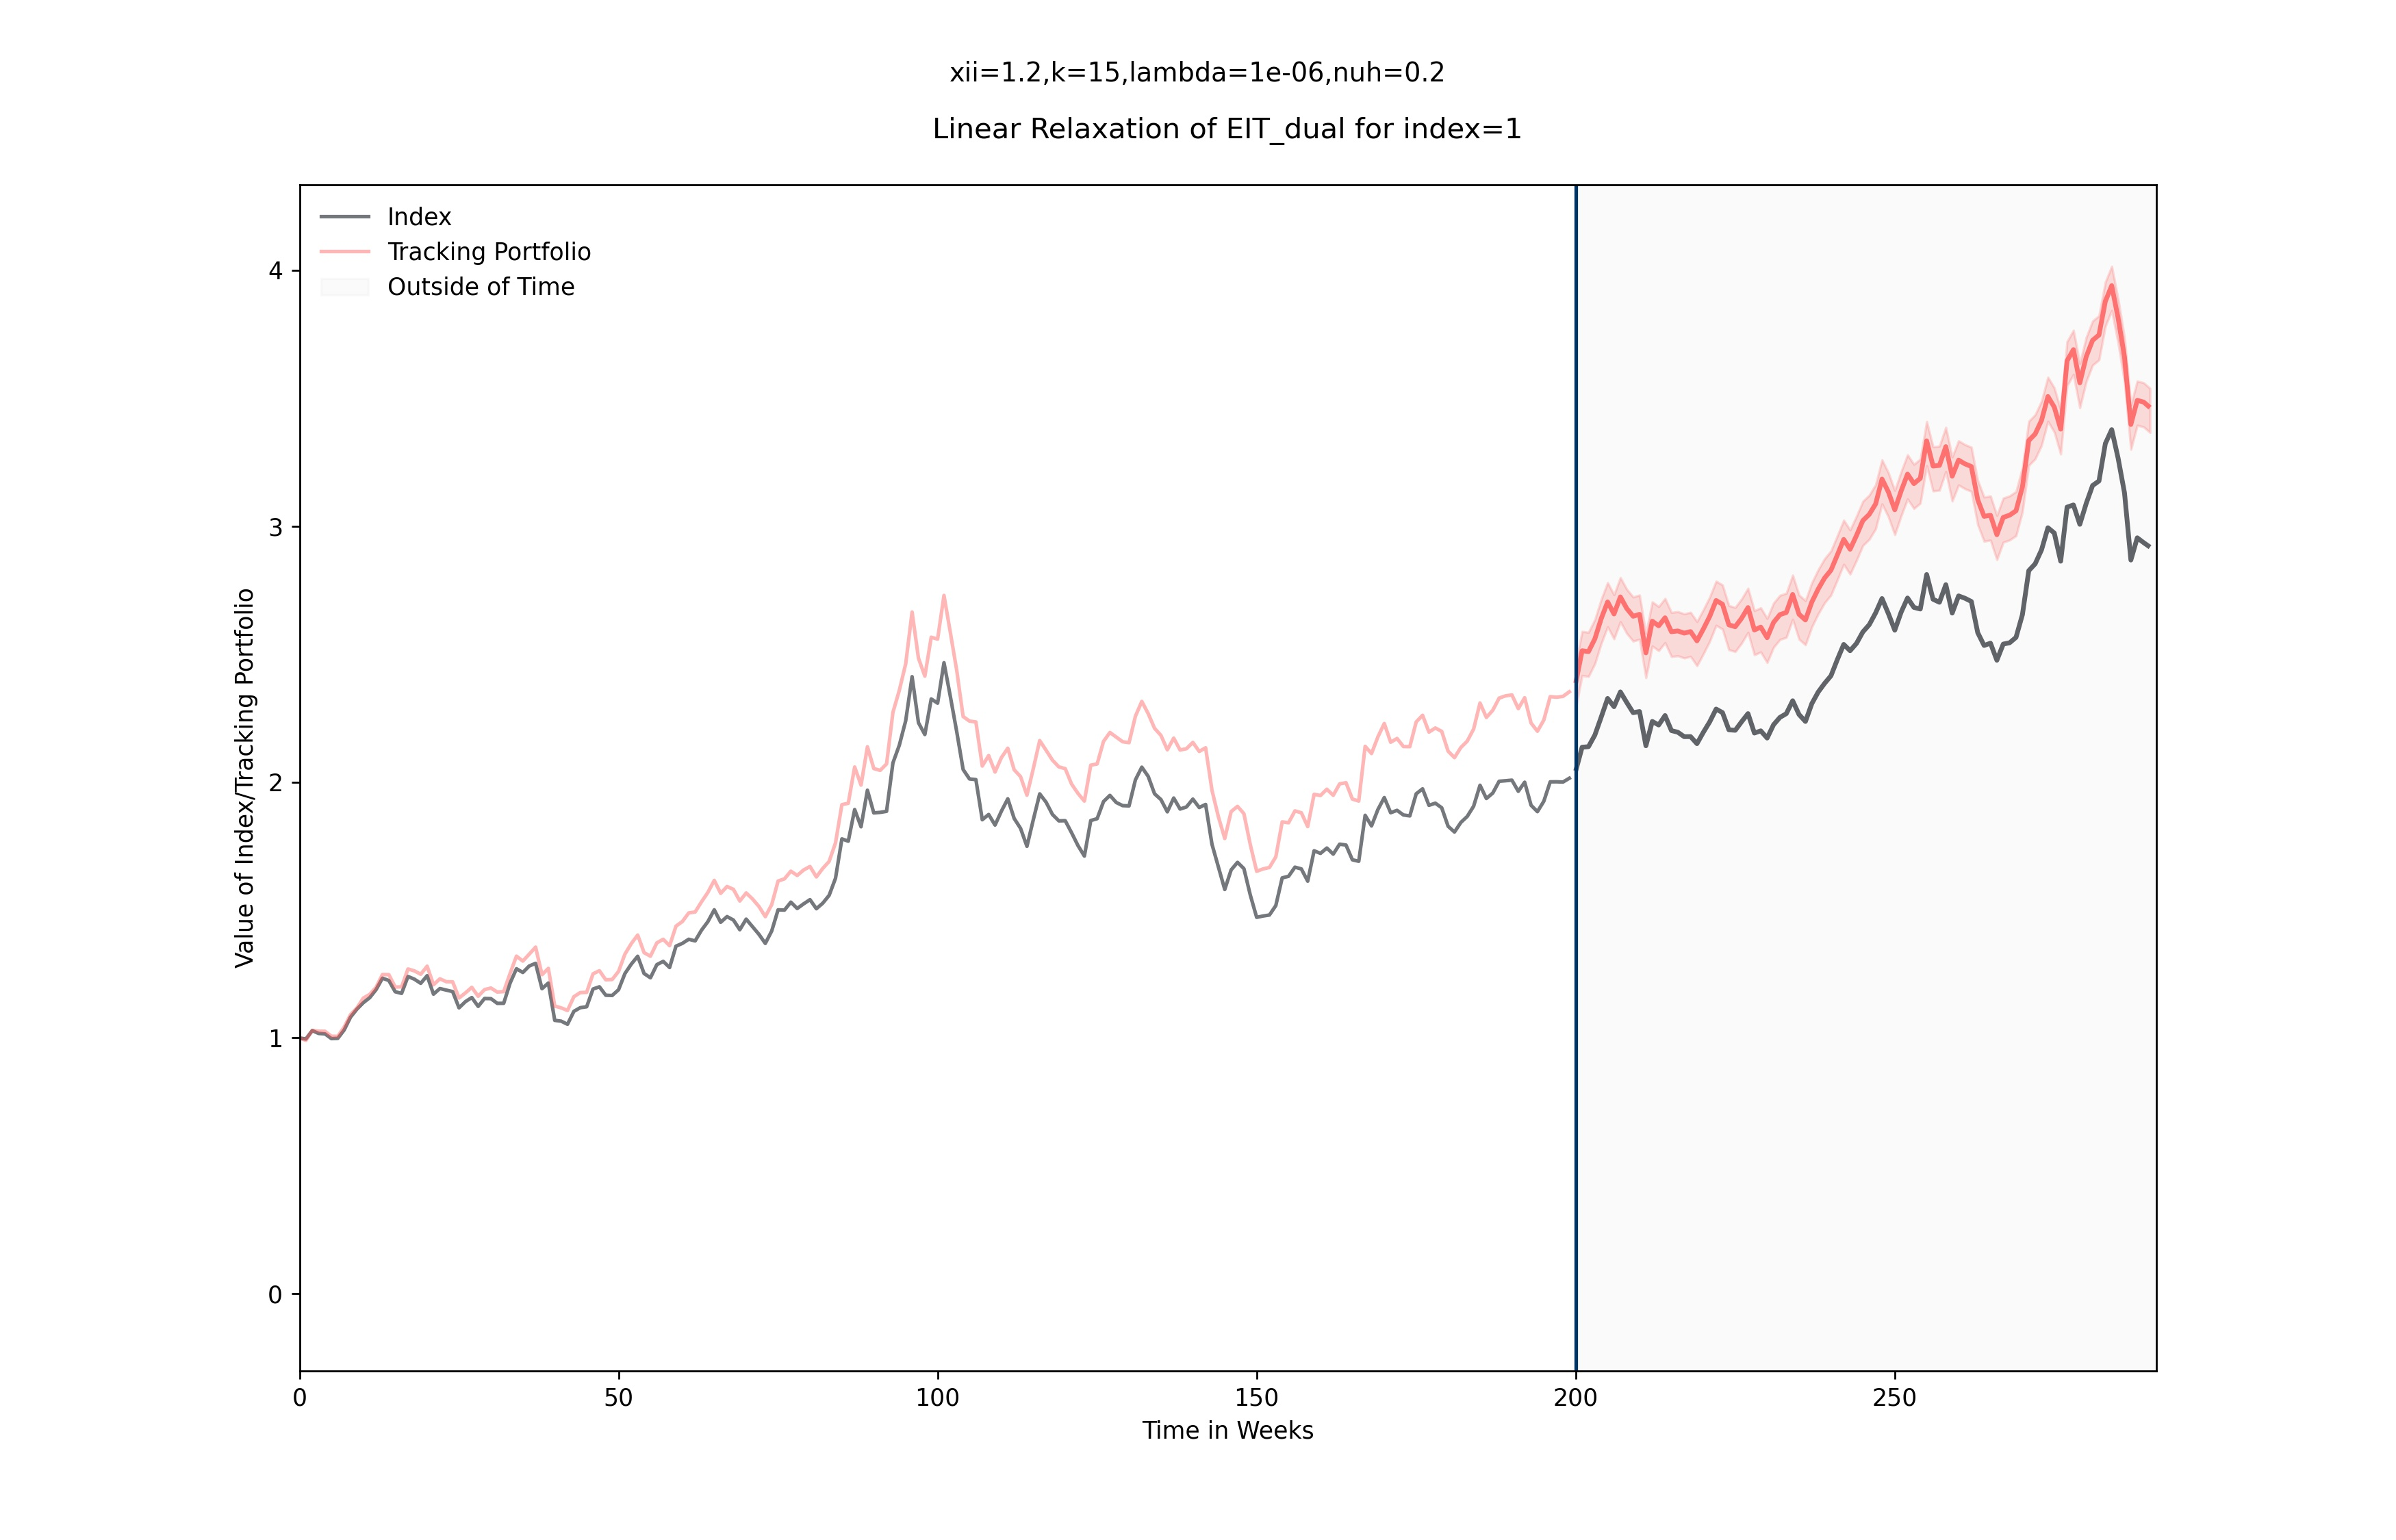

In [19]:
Image(filename=base_path+'/LP_EIT_Dual for index_{}.jpg'.format(file))

### Test step_1 of eit_dual_experiment

In [11]:
base_path="../eit_dual_experiments/exp_0.2a" #Don't add '/' at start and end

In [12]:
test_eit_dual=TestEitDual(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,pho=pho,lamda=lamda,\
                          nuh=nuh,xii=xii,k=k,p=p,f=f,w_risk=w_risk,w_return=w_return,w_risk_down=w_risk_down)

In [5]:
!rm -r $base_path

rm: ../eit_dual_experiments/exp_0.2: No such file or directory


In [7]:
test_eit_dual.give_params()

params(output='../eit_dual_experiments/exp_0.2', T=200, C=1000000, file=1, m=8, lbuck=2, pho=0.1, lamda=1e-08, nuh=0.2, xii=1.2, k=15, p=3, f=12, w_risk=110, w_return=100, w_risk_down=1)

In [13]:
result=test_eit_dual.step_1(from_root=False,verbose=True)

+----------------------------------------------------+
    Step 1: Solving Linear Relaxation of EIT-Dual
+----------------------------------------------------+
+----------------------------------------------------+
    Step 1 complete in 2.21s
+----------------------------------------------------+


In [14]:
result[1]

-0.242961366515525

### Test step2a

In [9]:
base_path="../eit_dual_experiments/exp_0.2a"
test_eit_dual=TestEitDual(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,pho=pho,lamda=lamda,\
                          nuh=nuh,xii=xii,k=k,p=p,f=f,w_risk=w_risk,w_return=w_return,w_risk_down=w_risk_down)

In [15]:
result_2a=test_eit_dual.step_2a(result[0],result[1],result[2],from_root=False,verbose=True)

+----------------------------------------------------+
    Step 2a: Sort Securities and create buckets
+----------------------------------------------------+


/Users/ashish1610dhiman/opt/anaconda3/envs/eit_paper/lib/python3.8/site-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
../src_dual/sort_and_buckets.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_optimal.sort_values(by="value", ascending=False, inplace=True)


In [16]:
result_2a

(['security_15',
  'security_27',
  'security_4',
  'security_26',
  'security_21',
  'security_23',
  'security_11',
  'security_14'],
 {1: ['security_22', 'security_1'],
  2: ['security_7', 'security_13'],
  3: ['security_25', 'security_20'],
  4: ['security_28', 'security_6'],
  5: ['security_29', 'security_31'],
  6: ['security_9', 'security_3'],
  7: ['security_19', 'security_5'],
  8: ['security_18', 'security_30'],
  9: ['security_17', 'security_10'],
  10: ['security_16', 'security_24'],
  11: ['security_2', 'security_12'],
  12: ['security_8']},
 ['security_15',
  'security_27',
  'security_4',
  'security_26',
  'security_21',
  'security_23',
  'security_11',
  'security_14',
  'security_22',
  'security_1',
  'security_7',
  'security_13',
  'security_25',
  'security_20',
  'security_28',
  'security_6',
  'security_29',
  'security_31',
  'security_9',
  'security_3',
  'security_19',
  'security_5',
  'security_18',
  'security_30',
  'security_17',
  'security_10',
  's